In [6]:
import torch
import torchvision

from torchvision import transforms,datasets

In [7]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))


test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose(transforms.ToTensor()))

In [8]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)




In [9]:
for data in trainset:
    print(data)
    break


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x, y = data[0][0], data[1][0]
print(y)


tensor(7)


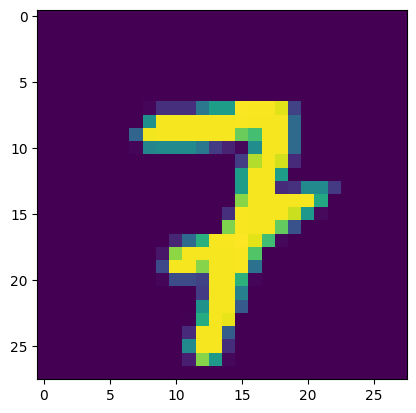

In [11]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))
plt.show()

In [12]:
import torch
# Count the number of occurrences of each digit (0-9)
label_counts = torch.bincount(train.targets)
testcount = len(test)
print(testcount)

# Print the count for each digit
for digit, count in enumerate(label_counts):
    print(f"Digit {digit}: {count} samples")
    
# Calculate total number of samples
total_samples = len(train)

# Print the percentage distribution for each digit
for digit, count in enumerate(label_counts):
    percentage = (count.item() / total_samples) * 100
    print(f"Digit {digit}: {percentage:.2f}%")

10000
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples
Digit 0: 9.87%
Digit 1: 11.24%
Digit 2: 9.93%
Digit 3: 10.22%
Digit 4: 9.74%
Digit 5: 9.04%
Digit 6: 9.86%
Digit 7: 10.44%
Digit 8: 9.75%
Digit 9: 9.92%


In [13]:
import torch.nn as nn
import torch.nn.functional as F

In [43]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [49]:
X = torch.randn((28, 28))
X = X.view(-1, 784)
output = net(X)
print("Output: \n", output)

Output: 
 tensor([[-2.1839, -2.2366, -2.3468, -2.3647, -2.2388, -2.2393, -2.2858, -2.3842,
         -2.4598, -2.3179]], grad_fn=<LogSoftmaxBackward0>)


In [45]:
import torch

if torch.cuda.is_available():
    print(f"CUDA Device Count: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



CUDA Device Count: 1
Device 0: NVIDIA GeForce RTX 3090


In [51]:
correct_predictions = 0
total_examples = 0

# Disable gradient computation to improve performance
with torch.no_grad():
    for data in trainset:
        input_data, target_label = data
        
        # Make predictions using the neural network
        output = net(input_data.view(-1, 784))
        
        # Increment correct/total counter based on prediction accuracy
        for predicted_class, actual_class in zip(output, target_label):
            if torch.argmax(predicted_class) == actual_class:
                correct_predictions += 1
            total_examples += 1
        
# Print the final accuracy as a rounded decimal value with 3 places
print("Accuracy:", round(correct_predictions / total_examples, 3))


Accuracy: 0.097


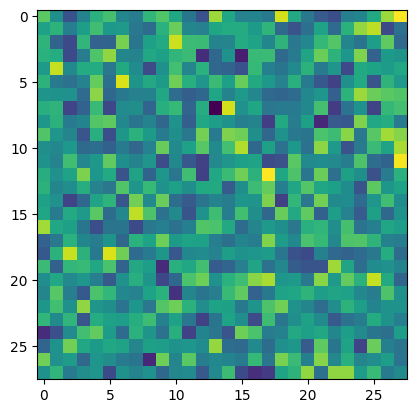

tensor(0)


In [54]:
import matplotlib.pyplot as ply

plt.imshow(X[0].view(28, 28))
plt.show()

print(torch.argmax(net(X[0].view(-1, 784))[0]))

In [53]:
import torch

# Define the device as 'cuda' if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define a simple model
model = torch.nn.Linear(10, 1)

# Move the model to GPU
model.to(device)

# Create some random input data and move it to GPU
input_data = torch.randn(5, 10).to(device)

# Perform forward pass
output = model(input_data)
print(output)


tensor([[ 0.6190],
        [-0.1064],
        [ 0.2964],
        [ 0.1571],
        [ 0.2168]], device='cuda:0', grad_fn=<AddmmBackward0>)
